# **PCA with Normalized Attribute Values and Dimensionality Reduction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer # dataset
from sklearn.linear_model import LogisticRegression # model

from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

In [21]:
data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

# Standardization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Original shape: {X.shape}")
print(f"Shape after PCA (95% variance): {X_pca.shape}")

Original shape: (569, 30)
Shape after PCA (95% variance): (569, 10)


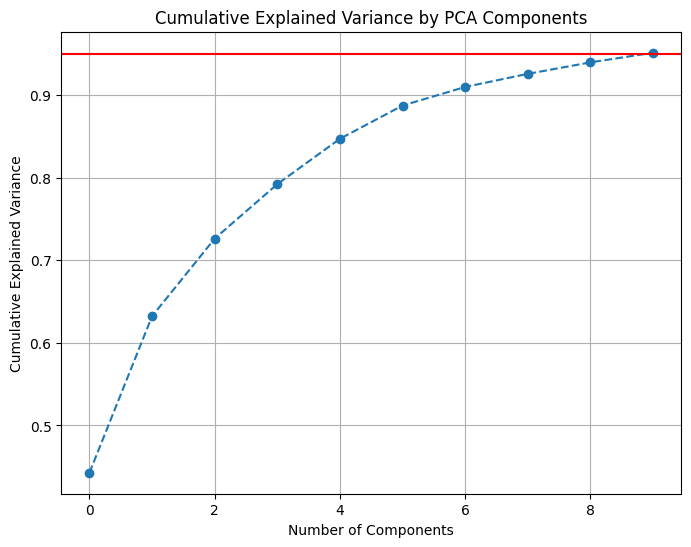

In [23]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [24]:
# Logistic regression model
model = LogisticRegression(max_iter=3000)

# Stratified 5-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated Accuracy Scores
accuracy_scores = cross_val_score(model, X_pca, y, cv=cv, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", accuracy_scores)
print(f"Mean CV Accuracy: {np.mean(accuracy_scores):.4f}")


Cross-Validation Accuracy Scores: [0.97368421 0.97368421 0.97368421 0.98245614 0.99115044]
Mean CV Accuracy: 0.9789


**Performance Metrics**

In [25]:
y_pred = cross_val_predict(model, X_pca, y, cv=cv)

print("\nConfusion Matrix:")
cm = confusion_matrix(y, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=data['target_names']))

roc_auc = roc_auc_score(y, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[204   8]
 [  4 353]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.96      0.97       212
      benign       0.98      0.99      0.98       357

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569

ROC-AUC Score: 0.9755


**ROC curve**

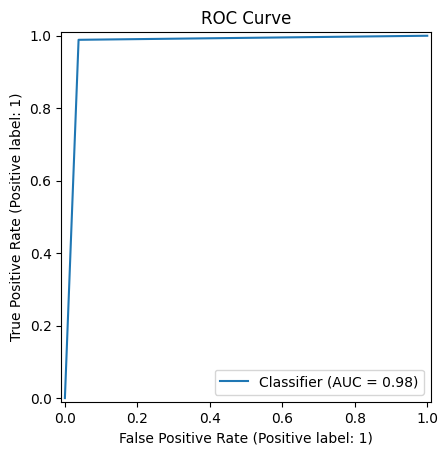

In [26]:
RocCurveDisplay.from_predictions(y, y_pred)
plt.title('ROC Curve')
plt.show()

**2D PCA Visualization**

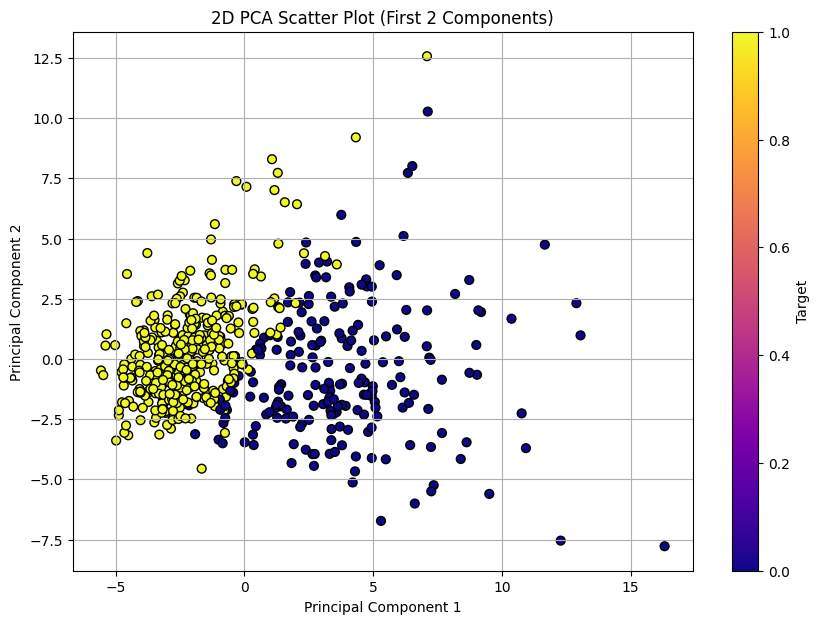

In [27]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap='plasma', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Scatter Plot (First 2 Components)')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()

**3D PCA Visualization**

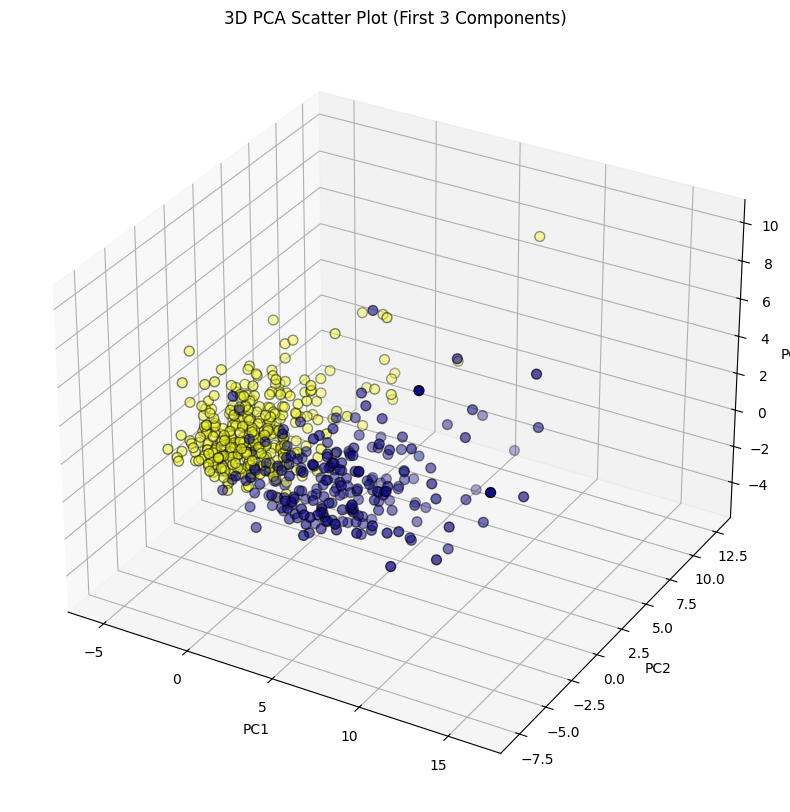

In [28]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], c=y, cmap='plasma', edgecolor='k', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Scatter Plot (First 3 Components)')
plt.show()

**Variance explained by different PCA**

In [29]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
